In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

In [2]:
#Read files
energy_use_data=pd.read_csv('ele.csv')
out_env_data=pd.read_csv('site_weather.csv')
in_cooling_data=pd.read_csv('zone_temp_sp_h.csv')
in_heating_data=pd.read_csv('zone_temp_sp_h.csv')
zone_temp_interior=pd.read_csv('zone_temp_interior.csv')
zone_temp_exterior=pd.read_csv('zone_temp_exterior.csv')
co2_conc=pd.read_csv('zone_co2.csv')
occupant=pd.read_csv('occ.csv')
wifi_data=pd.read_csv('wifi.csv')

In [30]:
energy_use_data.head()

,date,mels_S,lig_S,mels_N,hvac_N,hvac_S,Unnamed: 6
0,2018/1/1 1:00,1.2,0.2,7.5,37.400002,19.500000,NaN
1,2018/1/1 1:15,1.3,0.2,6.8,37.500000,19.889999,NaN
2,2018/1/1 1:30,1.1,0.2,7.4,38.000000,19.299999,NaN
3,2018/1/1 1:45,1.2,0.2,7.7,37.200001,18.889999,NaN
4,2018/1/1 2:00,1.1,0.2,7.3,37.400002,24.700001,NaN


For current project we will keep hvac_N and hvac_S as target variable.Based on this assumption, here we will drop mels_S, lig_S, mels_N and Unnamed:6 variable from erergy_use_data

In [31]:
energy_use_target=energy_use_data[['date','hvac_N','hvac_S']]

In [32]:
energy_use_target.head()

,date,hvac_N,hvac_S
0,2018/1/1 1:00,37.400002,19.500000
1,2018/1/1 1:15,37.500000,19.889999
2,2018/1/1 1:30,38.000000,19.299999
3,2018/1/1 1:45,37.200001,18.889999
4,2018/1/1 2:00,37.400002,24.700001


In [33]:
energy_use_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103048 entries, 0 to 103047
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    103048 non-null  object 
 1   hvac_N  101506 non-null  float64
 2   hvac_S  101506 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.4+ MB


In [34]:
out_env_data.head()

,date,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1
0,2018-01-01 00:00:00,11.64,11.51,8.10,79.07,86.70
1,2018-01-01 00:15:00,11.49,11.42,8.14,80.10,45.88
2,2018-01-01 00:30:00,11.59,11.51,8.21,79.92,51.62
3,2018-01-01 00:45:00,11.44,11.41,8.11,80.20,21.43
4,2018-01-01 01:00:00,11.12,11.15,8.04,81.50,6.45


In [35]:
out_env_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105217 entries, 0 to 105216
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          105217 non-null  object 
 1   air_temp_set_1                105217 non-null  float64
 2   air_temp_set_2                105217 non-null  float64
 3   dew_point_temperature_set_1d  105217 non-null  float64
 4   relative_humidity_set_1       105217 non-null  float64
 5   solar_radiation_set_1         105217 non-null  float64
dtypes: float64(5), object(1)
memory usage: 4.8+ MB


In [36]:
in_cooling_data.head()

,date,zone_016_heating_sp,zone_017_heating_sp,zone_018_heating_sp,zone_019_heating_sp,zone_021_heating_sp,zone_023_heating_sp,zone_024_heating_sp,zone_025_heating_sp,zone_026_heating_sp,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,2018/9/15 10:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018/9/15 10:05,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018/9/15 10:10,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018/9/15 10:15,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018/9/15 10:20,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
in_cooling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237126 entries, 0 to 237125
Data columns (total 52 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 237126 non-null  object 
 1   zone_016_heating_sp  236626 non-null  float64
 2   zone_017_heating_sp  236626 non-null  float64
 3   zone_018_heating_sp  236626 non-null  float64
 4   zone_019_heating_sp  235911 non-null  float64
 5   zone_021_heating_sp  236704 non-null  float64
 6   zone_023_heating_sp  236325 non-null  float64
 7   zone_024_heating_sp  236256 non-null  float64
 8   zone_025_heating_sp  236253 non-null  float64
 9   zone_026_heating_sp  236658 non-null  float64
 10  zone_027_heating_sp  236155 non-null  float64
 11  zone_030_heating_sp  236183 non-null  float64
 12  zone_032_heating_sp  235793 non-null  float64
 13  zone_035_heating_sp  236693 non-null  float64
 14  zone_036_heating_sp  236629 non-null  float64
 15  zone_037_heating_

In [38]:
in_heating_data.head()

,date,zone_016_heating_sp,zone_017_heating_sp,zone_018_heating_sp,zone_019_heating_sp,zone_021_heating_sp,zone_023_heating_sp,zone_024_heating_sp,zone_025_heating_sp,zone_026_heating_sp,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,2018/9/15 10:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018/9/15 10:05,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018/9/15 10:10,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018/9/15 10:15,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018/9/15 10:20,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
in_heating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237126 entries, 0 to 237125
Data columns (total 52 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 237126 non-null  object 
 1   zone_016_heating_sp  236626 non-null  float64
 2   zone_017_heating_sp  236626 non-null  float64
 3   zone_018_heating_sp  236626 non-null  float64
 4   zone_019_heating_sp  235911 non-null  float64
 5   zone_021_heating_sp  236704 non-null  float64
 6   zone_023_heating_sp  236325 non-null  float64
 7   zone_024_heating_sp  236256 non-null  float64
 8   zone_025_heating_sp  236253 non-null  float64
 9   zone_026_heating_sp  236658 non-null  float64
 10  zone_027_heating_sp  236155 non-null  float64
 11  zone_030_heating_sp  236183 non-null  float64
 12  zone_032_heating_sp  235793 non-null  float64
 13  zone_035_heating_sp  236693 non-null  float64
 14  zone_036_heating_sp  236629 non-null  float64
 15  zone_037_heating_

In [40]:
zone_temp_interior.head()

,date,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,cerc_templogger_15,cerc_templogger_16,cerc_templogger_2,cerc_templogger_3,cerc_templogger_4,cerc_templogger_5,cerc_templogger_6,cerc_templogger_7,cerc_templogger_8,cerc_templogger_9
0,2018-02-22 00:30:00,22.875,22.062,23.312,21.250,21.812,22.687,23.500,22.062,23.375,24.062,23.500,23.125,23.562,22.312,22.375,22.625
1,2018-02-22 00:40:00,22.937,22.750,23.375,21.937,21.812,22.687,23.500,21.937,23.125,24.000,23.562,22.875,23.750,22.500,22.500,22.687
2,2018-02-22 00:50:00,22.937,22.875,23.312,22.312,21.875,22.812,23.562,21.937,23.125,24.250,23.500,23.000,23.625,22.375,22.500,22.687
3,2018-02-22 01:00:00,22.937,23.000,23.375,22.375,21.812,22.812,23.125,21.750,23.375,24.187,23.500,23.062,24.000,22.437,22.375,22.875
4,2018-02-22 01:10:00,23.000,23.000,23.312,22.437,21.812,22.937,23.187,21.937,23.875,24.187,23.500,23.125,24.062,22.437,22.687,22.875


In [41]:
zone_temp_exterior.head()

,date,zone_016_temp,zone_017_temp,zone_018_temp,zone_019_temp,zone_021_temp,zone_022_temp,zone_023_temp,zone_024_temp,zone_025_temp,...,zone_063_temp,zone_064_temp,zone_065_temp,zone_066_temp,zone_067_temp,zone_068_temp,zone_069_temp,zone_070_temp,zone_071_temp,zone_072_temp
0,2018-01-01 00:00:00,67.9,66.7,66.4,69.6,65.2,67.4,66.4,67.5,66.5,...,71.0,71.2,69.3,69.9,70.3,71.7,70.7,69.8,70.0,71.0
1,2018-01-01 00:01:00,67.9,66.7,66.4,69.6,65.2,67.4,66.4,67.5,66.5,...,71.0,71.2,69.3,69.9,70.3,71.7,70.7,69.8,70.0,71.0
2,2018-01-01 00:02:00,67.9,66.7,66.4,69.6,65.2,67.4,66.4,67.5,66.5,...,71.0,71.2,69.3,69.9,70.3,71.7,70.7,69.8,70.0,71.0
3,2018-01-01 00:03:00,67.9,66.7,66.4,69.6,65.2,67.4,66.4,67.5,66.5,...,71.0,71.2,69.3,69.9,70.3,71.7,70.6,69.8,70.0,71.0
4,2018-01-01 00:04:00,67.9,66.7,66.4,69.6,65.2,67.4,66.4,67.5,66.5,...,71.0,71.2,69.3,69.9,70.3,71.7,70.6,69.8,70.0,71.0


In [42]:
co2_conc.head()

,date,zone_022_co2,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,2019/8/19 01:33,410.0,416.0,428.0,410.0,397.0,423.0,415.0,405.0,415.0,419.0,408.0
1,2019/8/19 01:34,410.0,418.0,421.0,411.0,406.0,420.0,408.0,405.0,417.0,412.0,412.0
2,2019/8/19 01:35,408.0,429.0,424.0,418.0,409.0,424.0,431.0,414.0,415.0,410.0,416.0
3,2019/8/19 01:36,413.0,414.0,426.0,416.0,407.0,418.0,436.0,414.0,423.0,409.0,417.0
4,2019/8/19 01:37,418.0,404.0,437.0,407.0,412.0,416.0,424.0,409.0,419.0,410.0,408.0


In [43]:
occupant.head()

,date,occ_third_south,occ_fourth_south
0,2018-05-22 07:00:00,0.0,0.0
1,2018-05-22 07:01:00,0.0,1.0
2,2018-05-22 07:02:00,0.0,0.0
3,2018-05-22 07:03:00,0.0,1.0
4,2018-05-22 07:04:00,0.0,0.0


In [44]:
wifi_data.head()

,date,wifi_first_south,wifi_second_south,wifi_third_south,wifi_fourth_south
0,2018/5/22 00:00,NaN,NaN,38.0,26.0
1,2018/5/22 00:10,NaN,NaN,37.0,26.0
2,2018/5/22 00:20,NaN,NaN,37.0,28.0
3,2018/5/22 00:30,NaN,NaN,36.0,27.0
4,2018/5/22 00:40,NaN,NaN,36.0,28.0


## File Pre-processing and Merging

#### Changing Date Format for all input files into '%Y-%m-%d %H:%M:%S'

In [45]:
energy_use_target['date'] = pd.to_datetime(energy_use_target['date'],format='%Y/%m/%d %H:%M')
energy_use_target['date'] = pd.to_datetime(energy_use_target['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))

C:\Users\anlek\AppData\Local\Temp\ipykernel_22964\108079657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_use_target['date'] = pd.to_datetime(energy_use_target['date'],format='%Y/%m/%d %H:%M')
C:\Users\anlek\AppData\Local\Temp\ipykernel_22964\108079657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_use_target['date'] = pd.to_datetime(energy_use_target['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))


In [46]:
energy_use_target.date

0        2018-01-01 01:00:00
1        2018-01-01 01:15:00
2        2018-01-01 01:30:00
3        2018-01-01 01:45:00
4        2018-01-01 02:00:00
                 ...        
103043   2020-12-31 23:00:00
103044   2020-12-31 23:15:00
103045   2020-12-31 23:30:00
103046   2020-12-31 23:45:00
103047   2021-01-01 00:00:00
Name: date, Length: 103048, dtype: datetime64[ns]

In [47]:
in_cooling_data['date'] = pd.to_datetime(in_cooling_data['date'],format='%Y/%m/%d %H:%M')
in_cooling_data['date'] = pd.to_datetime(in_cooling_data['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))

In [48]:

in_heating_data['date'] = pd.to_datetime(in_heating_data['date'],format='%Y/%m/%d %H:%M')
in_heating_data['date'] = pd.to_datetime(in_heating_data['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))


In [49]:
co2_conc['date'] = pd.to_datetime(co2_conc['date'],format='%Y/%m/%d %H:%M')
co2_conc['date'] = pd.to_datetime(co2_conc['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))

In [50]:

wifi_data['date'] = pd.to_datetime(wifi_data['date'],format='%Y/%m/%d %H:%M')
wifi_data['date'] = pd.to_datetime(wifi_data['date'].dt.strftime('%Y-%m-%d %H:%M:%S'))

In [51]:
##Converting all date columns into date formatted type
out_env_data['date'] = pd.to_datetime(out_env_data['date'],format='%Y-%m-%d %H:%M:%S')
zone_temp_interior['date'] = pd.to_datetime(zone_temp_interior['date'],format='%Y-%m-%d %H:%M:%S')
zone_temp_exterior['date'] = pd.to_datetime(zone_temp_exterior['date'],format='%Y-%m-%d %H:%M:%S')
occupant['date'] = pd.to_datetime(occupant['date'],format='%Y-%m-%d %H:%M:%S')


In [52]:
def change_dateformat(dataframe,col):
    dataframe[col]=pd.to_datetime(dataframe[col],format=='%Y/%m/%d %H:%M')
    dataframe[col]=dataframe[col].dt.strftime('%Y-%m-%d %H:%M:%S')
    return dataframe

#### Processing of in_cooling_data file and in_heating_data file

Both in_cooling_data and in_heating_data files have few unnamed fields with all NAN values. We will removed them for processing

In [53]:
in_cooling_data.drop(columns=['Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45',
                            'Unnamed: 46',
                            'Unnamed: 47', 
                            'Unnamed: 48',
                            'Unnamed: 49',
                            'Unnamed: 50',
                            'Unnamed: 51'],inplace=True)

In [54]:
in_heating_data.drop(columns=['Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45',
                            'Unnamed: 46',
                            'Unnamed: 47', 
                            'Unnamed: 48',
                            'Unnamed: 49',
                            'Unnamed: 50',
                            'Unnamed: 51'],inplace=True)

In [55]:
in_heating_data.head()

,date,zone_016_heating_sp,zone_017_heating_sp,zone_018_heating_sp,zone_019_heating_sp,zone_021_heating_sp,zone_023_heating_sp,zone_024_heating_sp,zone_025_heating_sp,zone_026_heating_sp,...,zone_061_heating_sp,zone_062_heating_sp,zone_063_heating_sp,zone_064_heating_sp,zone_065_heating_sp,zone_066_heating_sp,zone_067_heating_sp,zone_069_heating_sp,zone_070_heating_sp,zone_071_heating_sp
0,2018-09-15 10:00:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,64.0,64.0,72.0,70.0,70.0,70.0,70.0,72.0,72.0,70.0
1,2018-09-15 10:05:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,64.0,64.0,72.0,70.0,70.0,70.0,70.0,72.0,72.0,70.0
2,2018-09-15 10:10:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,64.0,64.0,72.0,70.0,70.0,70.0,70.0,72.0,72.0,70.0
3,2018-09-15 10:15:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,64.0,64.0,72.0,70.0,70.0,70.0,70.0,72.0,72.0,70.0
4,2018-09-15 10:20:00,70.0,70.0,72.0,64.0,72.0,70.0,70.0,70.0,70.0,...,64.0,64.0,72.0,70.0,70.0,70.0,70.0,72.0,72.0,70.0


#### Merging all the files based on date timestamp

In [56]:
#Merged_df=pd.merge(out_env_data,in_cooling_data,in_heating_data,zone_temp_interior,zone_temp_exterior,co2_conc,occupant,how='left')

In [57]:
#Merging indoor cooling and heating data
Merge_cooling_heating=pd.merge(in_cooling_data,in_heating_data,how='left')

In [58]:
#Merging outdoor environment data with indoor merged cooling and heating data
Merge_indoor_outdoor=pd.merge(out_env_data,Merge_cooling_heating,how='left')

In [59]:
#Merging with energy_use_target data
Merge_en=pd.merge(energy_use_target,Merge_indoor_outdoor,how='left')

In [60]:
Merge_en.isnull().sum()

date                                0
hvac_N                           1542
hvac_S                           1542
air_temp_set_1                   1525
air_temp_set_2                   1525
dew_point_temperature_set_1d     1525
relative_humidity_set_1          1525
solar_radiation_set_1            1525
zone_016_heating_sp             27017
zone_017_heating_sp             27017
zone_018_heating_sp             27017
zone_019_heating_sp             27255
zone_021_heating_sp             26991
zone_023_heating_sp             27118
zone_024_heating_sp             27141
zone_025_heating_sp             27142
zone_026_heating_sp             27007
zone_027_heating_sp             27174
zone_030_heating_sp             27165
zone_032_heating_sp             27295
zone_035_heating_sp             26995
zone_036_heating_sp             27016
zone_037_heating_sp             27017
zone_038_heating_sp             27220
zone_039_heating_sp             27220
zone_041_heating_sp             26852
zone_042_hea

In [61]:
Merge_en.shape

(103048, 49)

In [67]:
#Percentage of null values in each columns
Merge_en.isnull().sum() * 100 / len(Merge_en)

date                             0.000000
hvac_N                           1.496390
hvac_S                           1.496390
air_temp_set_1                   1.479893
air_temp_set_2                   1.479893
dew_point_temperature_set_1d     1.479893
relative_humidity_set_1          1.479893
solar_radiation_set_1            1.479893
zone_016_heating_sp             26.217879
zone_017_heating_sp             26.217879
zone_018_heating_sp             26.217879
zone_019_heating_sp             26.448839
zone_021_heating_sp             26.192648
zone_023_heating_sp             26.315892
zone_024_heating_sp             26.338211
zone_025_heating_sp             26.339182
zone_026_heating_sp             26.208175
zone_027_heating_sp             26.370235
zone_030_heating_sp             26.361501
zone_032_heating_sp             26.487656
zone_035_heating_sp             26.196530
zone_036_heating_sp             26.216909
zone_037_heating_sp             26.217879
zone_038_heating_sp             26

## Missing Value imputation 

### Reference: 
  - https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
       #### Here we will use Iterative Imputer / BayesianRidge model for iterative  imputations for all null values

  - Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

In [68]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn import linear_model

#imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')


In [69]:
Merge_en.columns

Index(['date', 'hvac_N', 'hvac_S', 'air_temp_set_1', 'air_temp_set_2',
       'dew_point_temperature_set_1d', 'relative_humidity_set_1',
       'solar_radiation_set_1', 'zone_016_heating_sp', 'zone_017_heating_sp',
       'zone_018_heating_sp', 'zone_019_heating_sp', 'zone_021_heating_sp',
       'zone_023_heating_sp', 'zone_024_heating_sp', 'zone_025_heating_sp',
       'zone_026_heating_sp', 'zone_027_heating_sp', 'zone_030_heating_sp',
       'zone_032_heating_sp', 'zone_035_heating_sp', 'zone_036_heating_sp',
       'zone_037_heating_sp', 'zone_038_heating_sp', 'zone_039_heating_sp',
       'zone_041_heating_sp', 'zone_042_heating_sp', 'zone_043_heating_sp',
       'zone_046_heating_sp', 'zone_047_heating_sp', 'zone_048_heating_sp',
       'zone_049_heating_sp', 'zone_051_heating_sp', 'zone_053_heating_sp',
       'zone_054_heating_sp', 'zone_055_heating_sp', 'zone_056_heating_sp',
       'zone_057_heating_sp', 'zone_059_heating_sp', 'zone_061_heating_sp',
       'zone_062_heating_

In [70]:
#X=Merge_en.loc[:,'zone_016_heating_sp':'zone_071_heating_sp']

In [71]:
X=Merge_en.loc[:,'hvac_N':'zone_071_heating_sp']

In [72]:
X.head()

,hvac_N,hvac_S,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1,zone_016_heating_sp,zone_017_heating_sp,zone_018_heating_sp,...,zone_061_heating_sp,zone_062_heating_sp,zone_063_heating_sp,zone_064_heating_sp,zone_065_heating_sp,zone_066_heating_sp,zone_067_heating_sp,zone_069_heating_sp,zone_070_heating_sp,zone_071_heating_sp
0,37.400002,19.500000,11.12,11.15,8.04,81.5,6.45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37.500000,19.889999,10.94,11.01,7.99,82.2,1.81,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38.000000,19.299999,10.79,10.84,7.93,82.7,0.24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37.200001,18.889999,10.71,10.73,8.02,83.6,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37.400002,24.700001,10.79,10.84,8.01,83.1,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# define imputer
imputer = IterativeImputer(random_state=42)
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)

In [74]:
Xtrans=pd.DataFrame(Xtrans.tolist())

#Replacing transformed columns backinto Merge_indoor_outdoor dataframe 
Xtrans.columns=X.columns
Merge_indoor_outdoor.loc[:,'zone_016_heating_sp':'zone_071_heating_sp']=Xtrans

In [75]:
#Replacing transformed columns backinto Merge_indoor_outdoor dataframe 
Xtrans.columns=X.columns
Merge_en.loc[:,'hvac_N':'zone_071_heating_sp']=Xtrans

In [76]:
#Percentage of null values in each columns
Merge_en.isnull().sum() * 100 / len(Merge_en)

date                            0.0
hvac_N                          0.0
hvac_S                          0.0
air_temp_set_1                  0.0
air_temp_set_2                  0.0
dew_point_temperature_set_1d    0.0
relative_humidity_set_1         0.0
solar_radiation_set_1           0.0
zone_016_heating_sp             0.0
zone_017_heating_sp             0.0
zone_018_heating_sp             0.0
zone_019_heating_sp             0.0
zone_021_heating_sp             0.0
zone_023_heating_sp             0.0
zone_024_heating_sp             0.0
zone_025_heating_sp             0.0
zone_026_heating_sp             0.0
zone_027_heating_sp             0.0
zone_030_heating_sp             0.0
zone_032_heating_sp             0.0
zone_035_heating_sp             0.0
zone_036_heating_sp             0.0
zone_037_heating_sp             0.0
zone_038_heating_sp             0.0
zone_039_heating_sp             0.0
zone_041_heating_sp             0.0
zone_042_heating_sp             0.0
zone_043_heating_sp         

We will merge zone_temp_interior, zone_temp_exterior and co2_conc based on date timestamp

In [77]:
#Merging interior and exterior zone temperature data
Merge_zone_temp=pd.merge(zone_temp_interior, zone_temp_exterior,how='left')

In [78]:
#Merging zone temperature with CO2 concentration
Merge_zonetemp_co2=pd.merge(Merge_zone_temp,co2_conc,how='left')

In [79]:
#Merging zone temperature with CO2 concentration
#Merge_zonetemp_co2=pd.merge(Merge_zone_temp,Merge_zone_temp,how='left')

In [80]:
Merge_zonetemp_co2.head()

,date,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,cerc_templogger_15,cerc_templogger_16,cerc_templogger_2,...,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,2018-02-22 00:30:00,22.875,22.062,23.312,21.250,21.812,22.687,23.500,22.062,23.375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-22 00:40:00,22.937,22.750,23.375,21.937,21.812,22.687,23.500,21.937,23.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-22 00:50:00,22.937,22.875,23.312,22.312,21.875,22.812,23.562,21.937,23.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-02-22 01:00:00,22.937,23.000,23.375,22.375,21.812,22.812,23.125,21.750,23.375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-02-22 01:10:00,23.000,23.000,23.312,22.437,21.812,22.937,23.187,21.937,23.875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#Percentage of null values in each columns
Merge_zonetemp_co2.isnull().sum() * 100 / len(Merge_zonetemp_co2)

date                   0.000000
cerc_templogger_1      2.512515
cerc_templogger_10     4.866479
cerc_templogger_11     0.243580
cerc_templogger_12     7.833548
                        ...    
zone_052_co2          61.516331
zone_058_co2          61.516331
zone_062_co2          61.516331
zone_068_co2          61.516331
zone_072_co2          61.516331
Length: 79, dtype: float64

### Using Iterative Imputer we will be replacing null values in this merged dataset

In [82]:
feature_Trans1=Merge_zonetemp_co2.loc[:,'cerc_templogger_1':'zone_072_co2']

In [83]:
feature_Trans1.columns

Index(['cerc_templogger_1', 'cerc_templogger_10', 'cerc_templogger_11',
       'cerc_templogger_12', 'cerc_templogger_13', 'cerc_templogger_14',
       'cerc_templogger_15', 'cerc_templogger_16', 'cerc_templogger_2',
       'cerc_templogger_3', 'cerc_templogger_4', 'cerc_templogger_5',
       'cerc_templogger_6', 'cerc_templogger_7', 'cerc_templogger_8',
       'cerc_templogger_9', 'zone_016_temp', 'zone_017_temp', 'zone_018_temp',
       'zone_019_temp', 'zone_021_temp', 'zone_022_temp', 'zone_023_temp',
       'zone_024_temp', 'zone_025_temp', 'zone_026_temp', 'zone_027_temp',
       'zone_028_temp', 'zone_030_temp', 'zone_032_temp', 'zone_033_temp',
       'zone_035_temp', 'zone_036_temp', 'zone_037_temp', 'zone_038_temp',
       'zone_039_temp', 'zone_040_temp', 'zone_041_temp', 'zone_042_temp',
       'zone_043_temp', 'zone_044_temp', 'zone_045_temp', 'zone_046_temp',
       'zone_047_temp', 'zone_048_temp', 'zone_049_temp', 'zone_051_temp',
       'zone_052_temp', 'zone_053_temp'

In [84]:
iter_imputer = IterativeImputer(random_state=42)
# fit on the dataset
iter_imputer.fit(feature_Trans1)

C:\Users\anlek\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(random_state=42)

In [85]:
#from sklearn.impute import KNNImputer

In [86]:
# transform the dataset
#Xtrans1 = imputer.transform(feature_Trans1)
#Xtrans1 = KNNImputer(n_neighbors=5)


In [87]:
Xtrans1=iter_imputer.transform(feature_Trans1)

In [88]:
Xtrans1=pd.DataFrame(Xtrans1.tolist())
Xtrans1

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,22.875,22.062,23.312,21.250,21.812,22.687,23.500,22.062,23.375,24.062,...,406.685944,415.992929,389.256802,396.991749,424.593745,411.501573,398.580055,395.910296,396.126202,400.775840
1,22.937,22.750,23.375,21.937,21.812,22.687,23.500,21.937,23.125,24.000,...,406.553695,414.253415,394.675041,400.067085,418.523336,404.521478,394.691263,389.072032,401.234544,400.602436
2,22.937,22.875,23.312,22.312,21.875,22.812,23.562,21.937,23.125,24.250,...,406.863198,415.252374,395.388469,399.975718,419.706410,405.012621,394.512564,389.146739,400.758278,400.250780
3,22.937,23.000,23.375,22.375,21.812,22.812,23.125,21.750,23.375,24.187,...,407.687128,415.756245,397.184922,399.769783,421.018314,404.065852,395.098470,388.186024,402.832261,400.851355
4,23.000,23.000,23.312,22.437,21.812,22.937,23.187,21.937,23.875,24.187,...,409.561437,416.690097,397.047590,399.723561,422.489866,404.921736,395.422597,388.761375,403.299026,400.839110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156412,22.000,21.562,22.187,19.937,19.937,19.125,19.437,19.062,22.125,21.750,...,431.000000,406.000000,412.000000,411.000000,402.000000,412.000000,395.000000,404.000000,398.000000,409.000000
156413,22.062,21.625,22.187,19.937,19.937,19.375,19.500,19.187,22.000,21.625,...,400.000000,411.000000,419.000000,415.000000,405.000000,408.000000,398.000000,404.000000,409.000000,393.000000
156414,22.125,21.687,22.000,19.937,19.875,19.125,19.562,19.062,22.500,21.687,...,409.000000,411.000000,423.000000,414.000000,405.000000,403.000000,392.000000,400.000000,416.000000,403.000000
156415,22.312,21.625,22.437,20.125,20.000,19.375,19.687,19.375,22.687,21.750,...,410.000000,414.000000,406.000000,425.000000,404.000000,407.000000,404.000000,409.000000,418.000000,404.000000


In [89]:
Xtrans1.columns=feature_Trans1.columns

In [90]:
Xtrans1.head()

,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,cerc_templogger_15,cerc_templogger_16,cerc_templogger_2,cerc_templogger_3,...,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,22.875,22.062,23.312,21.250,21.812,22.687,23.500,22.062,23.375,24.062,...,406.685944,415.992929,389.256802,396.991749,424.593745,411.501573,398.580055,395.910296,396.126202,400.775840
1,22.937,22.750,23.375,21.937,21.812,22.687,23.500,21.937,23.125,24.000,...,406.553695,414.253415,394.675041,400.067085,418.523336,404.521478,394.691263,389.072032,401.234544,400.602436
2,22.937,22.875,23.312,22.312,21.875,22.812,23.562,21.937,23.125,24.250,...,406.863198,415.252374,395.388469,399.975718,419.706410,405.012621,394.512564,389.146739,400.758278,400.250780
3,22.937,23.000,23.375,22.375,21.812,22.812,23.125,21.750,23.375,24.187,...,407.687128,415.756245,397.184922,399.769783,421.018314,404.065852,395.098470,388.186024,402.832261,400.851355
4,23.000,23.000,23.312,22.437,21.812,22.937,23.187,21.937,23.875,24.187,...,409.561437,416.690097,397.047590,399.723561,422.489866,404.921736,395.422597,388.761375,403.299026,400.839110


In [91]:
#Replacing transformed columns backinto Merge_indoor_outdoor dataframe 
#Xtrans1.columns=X.columns
Merge_zonetemp_co2.loc[:,'cerc_templogger_1':'zone_072_co2']=Xtrans1

In [92]:
#Merge_zonetemp_co2=Xtrans1

In [93]:
Merge_zonetemp_co2.isnull().sum()

date                  0
cerc_templogger_1     0
cerc_templogger_10    0
cerc_templogger_11    0
cerc_templogger_12    0
                     ..
zone_052_co2          0
zone_058_co2          0
zone_062_co2          0
zone_068_co2          0
zone_072_co2          0
Length: 79, dtype: int64

In [94]:
#Percentage of null values in each columns
Merge_zonetemp_co2.isnull().sum() * 100 / len(Merge_zonetemp_co2)

date                  0.0
cerc_templogger_1     0.0
cerc_templogger_10    0.0
cerc_templogger_11    0.0
cerc_templogger_12    0.0
                     ... 
zone_052_co2          0.0
zone_058_co2          0.0
zone_062_co2          0.0
zone_068_co2          0.0
zone_072_co2          0.0
Length: 79, dtype: float64

In [95]:
Merge_zonetemp_co2.head()

,date,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,cerc_templogger_15,cerc_templogger_16,cerc_templogger_2,...,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,2018-02-22 00:30:00,22.875,22.062,23.312,21.250,21.812,22.687,23.500,22.062,23.375,...,406.685944,415.992929,389.256802,396.991749,424.593745,411.501573,398.580055,395.910296,396.126202,400.775840
1,2018-02-22 00:40:00,22.937,22.750,23.375,21.937,21.812,22.687,23.500,21.937,23.125,...,406.553695,414.253415,394.675041,400.067085,418.523336,404.521478,394.691263,389.072032,401.234544,400.602436
2,2018-02-22 00:50:00,22.937,22.875,23.312,22.312,21.875,22.812,23.562,21.937,23.125,...,406.863198,415.252374,395.388469,399.975718,419.706410,405.012621,394.512564,389.146739,400.758278,400.250780
3,2018-02-22 01:00:00,22.937,23.000,23.375,22.375,21.812,22.812,23.125,21.750,23.375,...,407.687128,415.756245,397.184922,399.769783,421.018314,404.065852,395.098470,388.186024,402.832261,400.851355
4,2018-02-22 01:10:00,23.000,23.000,23.312,22.437,21.812,22.937,23.187,21.937,23.875,...,409.561437,416.690097,397.047590,399.723561,422.489866,404.921736,395.422597,388.761375,403.299026,400.839110


Merge Merge_indoor_outdoor and Merge_zonetemp_co2 dataframes based on date timestamp

In [96]:
all_df=pd.merge(Merge_en, Merge_zonetemp_co2,how='inner')

In [97]:
all_df.head()

,date,hvac_N,hvac_S,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1,zone_016_heating_sp,zone_017_heating_sp,...,zone_028_co2,zone_033_co2,zone_040_co2,zone_044_co2,zone_045_co2,zone_052_co2,zone_058_co2,zone_062_co2,zone_068_co2,zone_072_co2
0,2018-02-22 00:30:00,47.816667,18.033333,10.43,10.07,-5.98,31.28,245.60,68.905036,68.918250,...,406.685944,415.992929,389.256802,396.991749,424.593745,411.501573,398.580055,395.910296,396.126202,400.775840
1,2018-02-22 01:00:00,47.231111,18.122222,9.76,9.51,-4.26,37.27,157.90,68.908538,68.921847,...,407.687128,415.756245,397.184922,399.769783,421.018314,404.065852,395.098470,388.186024,402.832261,400.851355
2,2018-02-22 01:30:00,46.645556,18.211111,8.99,8.82,-2.81,43.72,67.74,68.911125,68.924485,...,410.183110,417.192094,395.993798,399.566480,425.910259,410.668408,398.382923,395.391205,401.226493,402.923478
3,2018-02-22 02:00:00,46.060000,18.300000,8.20,8.13,-1.80,49.65,8.35,68.912116,68.925388,...,409.859402,416.382527,393.884073,397.575192,427.659487,410.512872,397.405899,394.419118,400.016849,401.537824
4,2018-02-22 02:30:00,45.474444,18.388889,7.64,7.67,-1.11,54.23,0.06,68.912135,68.925134,...,411.948647,418.227176,395.753707,400.022452,430.772951,415.229530,401.512520,397.880444,401.598937,403.786239


In [98]:
all_df.isnull().sum()

date              0
hvac_N            0
hvac_S            0
air_temp_set_1    0
air_temp_set_2    0
                 ..
zone_052_co2      0
zone_058_co2      0
zone_062_co2      0
zone_068_co2      0
zone_072_co2      0
Length: 127, dtype: int64

In [99]:
#Percentage of null values in each columns
all_df.isnull().sum() * 100 / len(Merge_zonetemp_co2)

date              0.0
hvac_N            0.0
hvac_S            0.0
air_temp_set_1    0.0
air_temp_set_2    0.0
                 ... 
zone_052_co2      0.0
zone_058_co2      0.0
zone_062_co2      0.0
zone_068_co2      0.0
zone_072_co2      0.0
Length: 127, dtype: float64

## Feature Selection 

#### We will be using following types of feature selection processs
  -   Correlation Statistics.
  -   
Mutual Information Statistics

####  References
    -   https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html
    -   https://machinelearningmastery.com/feature-selection-for-regression-data/.

In [ ]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

 As per our assumption hvac_S and hvac_N are the target variables. Here we will separate features and target variables. Also we are dropping non numeric Date parameter for linear regression.

In [ ]:
all_df.drop(columns=['date'],inplace=True)

In [ ]:
feature=all_df.drop(columns=['hvac_S','hvac_N'])

In [ ]:
target=all_df[['hvac_S','hvac_N']]

In [ ]:
feature.head()

In [ ]:
target.head()

In [ ]:
# spliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.33, random_state=1)

We performed feature selection process in the following order:
-  1. Correlation Statistics:
        - a. Target variable : Hvac_S
        - b. Target variable : Hvac_N
-  2. Mutual Information :
        - a. Target variable : Hvac_S
        - b. Target variable : Hvac_N

### 1. Feature selection using correlation statistics

In [ ]:
# feature selection
def select_features_corstat(X_train, y_train, X_test):
    #Converting y_train into 1-dimensional
    y_train=np.ravel(y_train)
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

### 1.a We will be selecting Features using correlation statistics for target variable hvac_S

In [ ]:
# feature selection process
X_train_fs, X_test_fs, fs = select_features_corstat(X_train, y_train.hvac_S, X_test)

In [ ]:
# Checking the scores for the features
feature_list_hvacS_cor={}
for i in range(len(fs.scores_)):
    feature_list_hvacS_cor.update({fs.feature_names_in_[i]: fs.scores_[i]})
    print('Feature %d: %s : %f' % (i,fs.feature_names_in_[i], fs.scores_[i]))


In [ ]:
#creating dataframe from dictionary
selected_feature_1=pd.DataFrame.from_dict(feature_list_hvacS_cor,columns=['value'],orient='index')

#Sorting and listing top 40 features based on scores
top_40_withcorr_score_S=selected_feature_1.sort_values(by='value',ascending=False)[:40]

In [ ]:
top_40_withcorr_score_S.index

In [ ]:
feature_select_df_hvacS_1=all_df.loc[:,top_40_withcorr_score.index]
#feature_select_df_hvacS_1.to_csv('feature_select_df_hvacS_1.csv', sep=',', index=False, encoding='utf-8')

In [ ]:
# plot the scores
#plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.figure(figsize=(25, 8))
plt.bar(selected_feature_1.index,selected_feature_1.value)
plt.xticks(selected_feature_1.index, rotation='vertical')
plt.show()

### 1.b We will be selecting Features using correlation statistics for target variable hvac_N

In [254]:
# feature selection process
X_train_fsN, X_test_fsN, fsN = select_features_corstat(X_train, y_train.hvac_N, X_test)

In [255]:
# Checking the scores for the features
feature_list_hvacN_cor={}
for i in range(len(fsN.scores_)):
    feature_list_hvacN_cor.update({fsN.feature_names_in_[i]: fsN.scores_[i]})
    print('Feature %d: %s : %f' % (i,fsN.feature_names_in_[i], fsN.scores_[i]))


Feature 0: air_temp_set_1 : 323.399355
Feature 1: air_temp_set_2 : 422.881832
Feature 2: dew_point_temperature_set_1d : 175.419263
Feature 3: relative_humidity_set_1 : 33.580283
Feature 4: solar_radiation_set_1 : 506.983791
Feature 5: zone_016_heating_sp : 221.426926
Feature 6: zone_017_heating_sp : 233.078671
Feature 7: zone_018_heating_sp : 975.572440
Feature 8: zone_019_heating_sp : 3443.334314
Feature 9: zone_021_heating_sp : 1019.846179
Feature 10: zone_023_heating_sp : 470.716264
Feature 11: zone_024_heating_sp : 436.299801
Feature 12: zone_025_heating_sp : 246.430326
Feature 13: zone_026_heating_sp : 765.238729
Feature 14: zone_027_heating_sp : 491.455111
Feature 15: zone_030_heating_sp : 65.291631
Feature 16: zone_032_heating_sp : 0.143576
Feature 17: zone_035_heating_sp : 2196.955327
Feature 18: zone_036_heating_sp : 3798.317385
Feature 19: zone_037_heating_sp : 2014.597893
Feature 20: zone_038_heating_sp : 1097.710976
Feature 21: zone_039_heating_sp : 152.530791
Feature 22: z

In [256]:
#creating dataframe from dictionary
selected_feature_N1=pd.DataFrame.from_dict(feature_list_hvacN_cor,columns=['value'],orient='index')

#Sorting and listing top 40 features based on scores
top_40_withcorr_score_N=selected_feature_N1.sort_values(by='value',ascending=False)[:40]

In [257]:
top_40_withcorr_score_N.index

Index(['zone_069_heating_sp', 'zone_057_heating_sp', 'cerc_templogger_5',
       'zone_070_heating_sp', 'zone_063_heating_sp', 'zone_061_temp',
       'zone_062_heating_sp', 'zone_059_temp', 'zone_030_temp',
       'zone_066_heating_sp', 'zone_059_heating_sp', 'zone_032_temp',
       'zone_036_heating_sp', 'cerc_templogger_11', 'zone_049_heating_sp',
       'zone_019_heating_sp', 'zone_055_heating_sp', 'zone_062_temp',
       'zone_064_temp', 'zone_064_heating_sp', 'cerc_templogger_7',
       'zone_033_temp', 'zone_071_temp', 'zone_056_heating_sp',
       'zone_037_temp', 'zone_035_heating_sp', 'zone_068_temp',
       'cerc_templogger_3', 'zone_065_heating_sp', 'zone_037_heating_sp',
       'cerc_templogger_13', 'zone_035_temp', 'zone_043_heating_sp',
       'zone_019_temp', 'zone_066_temp', 'zone_048_heating_sp',
       'cerc_templogger_16', 'cerc_templogger_8', 'zone_054_temp',
       'zone_041_heating_sp'],
      dtype='object')

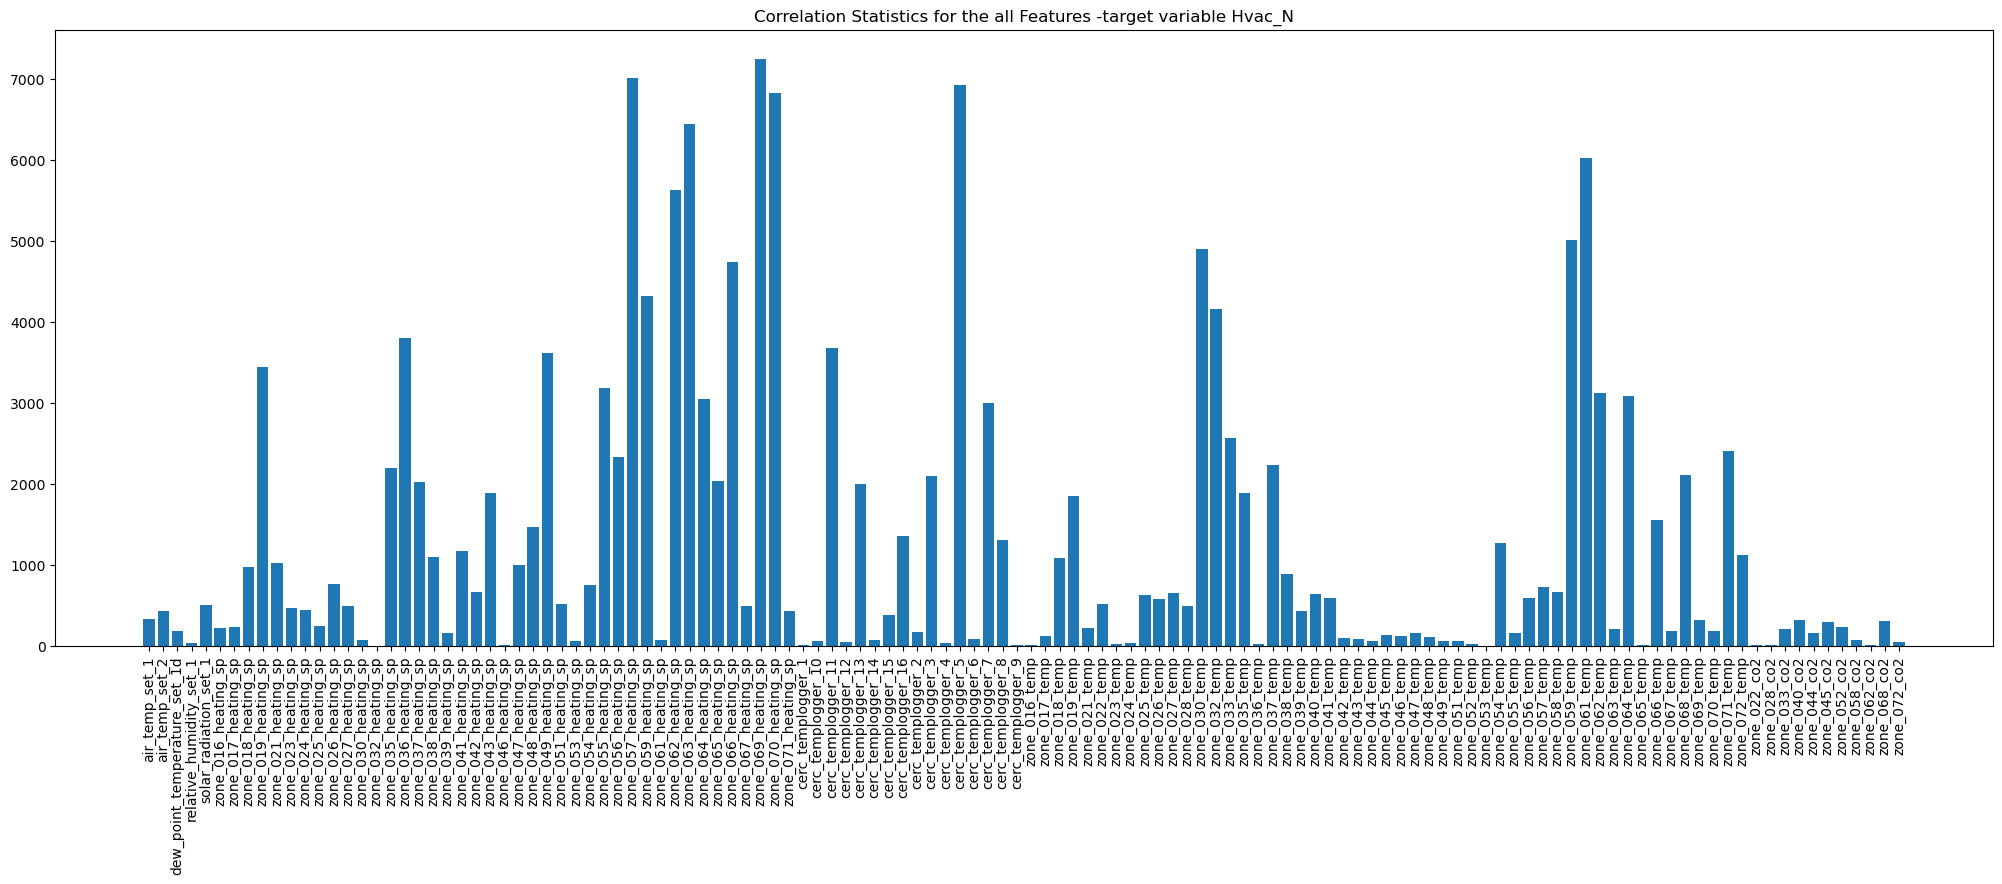

In [258]:
# plot the scores

plt.figure(figsize=(25, 8))
plt.bar(selected_feature_N1.index,selected_feature_N1.value)
plt.xticks(selected_feature_N1.index, rotation='vertical')
plt.title('Correlation Statistics for the all Features -target variable Hvac_N')
plt.show()

### 2.Feature selection and Linear Regression model using Mutual Information statistics


In [259]:
# feature selection
def select_features_mutinfo(X_train, y_train, X_test):
    #Converting y_train into 1-dimensional
    y_train=np.ravel(y_train)
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=88)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


### 2.a Mutual Information statistics - Target Variable hvac_S

In [260]:
# feature selection
X_train_fs, X_test_fs, fs = select_features_mutinfo(X_train, y_train.hvac_S, X_test)

In [261]:

# Checking the scores for the features
feature_list_hvacS_mut={}
for i in range(len(fs.scores_)):
    feature_list_hvacS_mut.update({fs.feature_names_in_[i]: fs.scores_[i]})
    print('Feature %d: %s : %f' % (i,fs.feature_names_in_[i], fs.scores_[i]))


Feature 0: air_temp_set_1 : 0.482675
Feature 1: air_temp_set_2 : 0.503317
Feature 2: dew_point_temperature_set_1d : 0.261926
Feature 3: relative_humidity_set_1 : 0.333524
Feature 4: solar_radiation_set_1 : 0.244428
Feature 5: zone_016_heating_sp : 0.306699
Feature 6: zone_017_heating_sp : 0.292174
Feature 7: zone_018_heating_sp : 0.309382
Feature 8: zone_019_heating_sp : 0.172771
Feature 9: zone_021_heating_sp : 0.239945
Feature 10: zone_023_heating_sp : 0.399586
Feature 11: zone_024_heating_sp : 0.228773
Feature 12: zone_025_heating_sp : 0.394573
Feature 13: zone_026_heating_sp : 0.296882
Feature 14: zone_027_heating_sp : 0.231302
Feature 15: zone_030_heating_sp : 0.412768
Feature 16: zone_032_heating_sp : 0.402639
Feature 17: zone_035_heating_sp : 0.350988
Feature 18: zone_036_heating_sp : 0.315514
Feature 19: zone_037_heating_sp : 0.387256
Feature 20: zone_038_heating_sp : 0.428364
Feature 21: zone_039_heating_sp : 0.367184
Feature 22: zone_041_heating_sp : 0.334480
Feature 23: zone

In [262]:
#creating dataframe from dictionary
selected_feature_2=pd.DataFrame.from_dict(feature_list_hvacS_mut,columns=['value'],orient='index')

#Sorting and listing top 40 features based on scores
top_40_withmut_score=selected_feature_2.sort_values(by='value',ascending=False)[:40]

feature_select_df_hvacS_2=all_df.loc[:,top_40_withmut_score.index]
#feature_select_df_hvacS_2.to_csv('feature_select_df_hvacS_2.csv', sep=',', index=False, encoding='utf-8')

In [263]:
top_40_withmut_score.index

Index(['zone_043_heating_sp', 'air_temp_set_2', 'air_temp_set_1',
       'zone_047_heating_sp', 'zone_038_heating_sp', 'zone_061_heating_sp',
       'zone_066_heating_sp', 'zone_070_heating_sp', 'zone_030_heating_sp',
       'zone_049_heating_sp', 'zone_042_heating_sp', 'zone_062_heating_sp',
       'zone_032_heating_sp', 'zone_059_heating_sp', 'zone_065_heating_sp',
       'zone_023_heating_sp', 'zone_025_heating_sp', 'zone_037_heating_sp',
       'zone_056_heating_sp', 'zone_051_heating_sp', 'zone_054_heating_sp',
       'zone_071_heating_sp', 'zone_039_heating_sp', 'cerc_templogger_5',
       'zone_035_heating_sp', 'zone_057_heating_sp', 'zone_063_heating_sp',
       'zone_067_heating_sp', 'zone_055_heating_sp', 'zone_053_heating_sp',
       'zone_064_heating_sp', 'zone_041_heating_sp', 'zone_032_temp',
       'relative_humidity_set_1', 'cerc_templogger_15', 'cerc_templogger_11',
       'zone_021_temp', 'zone_051_temp', 'zone_019_temp',
       'cerc_templogger_10'],
      dtype='obj

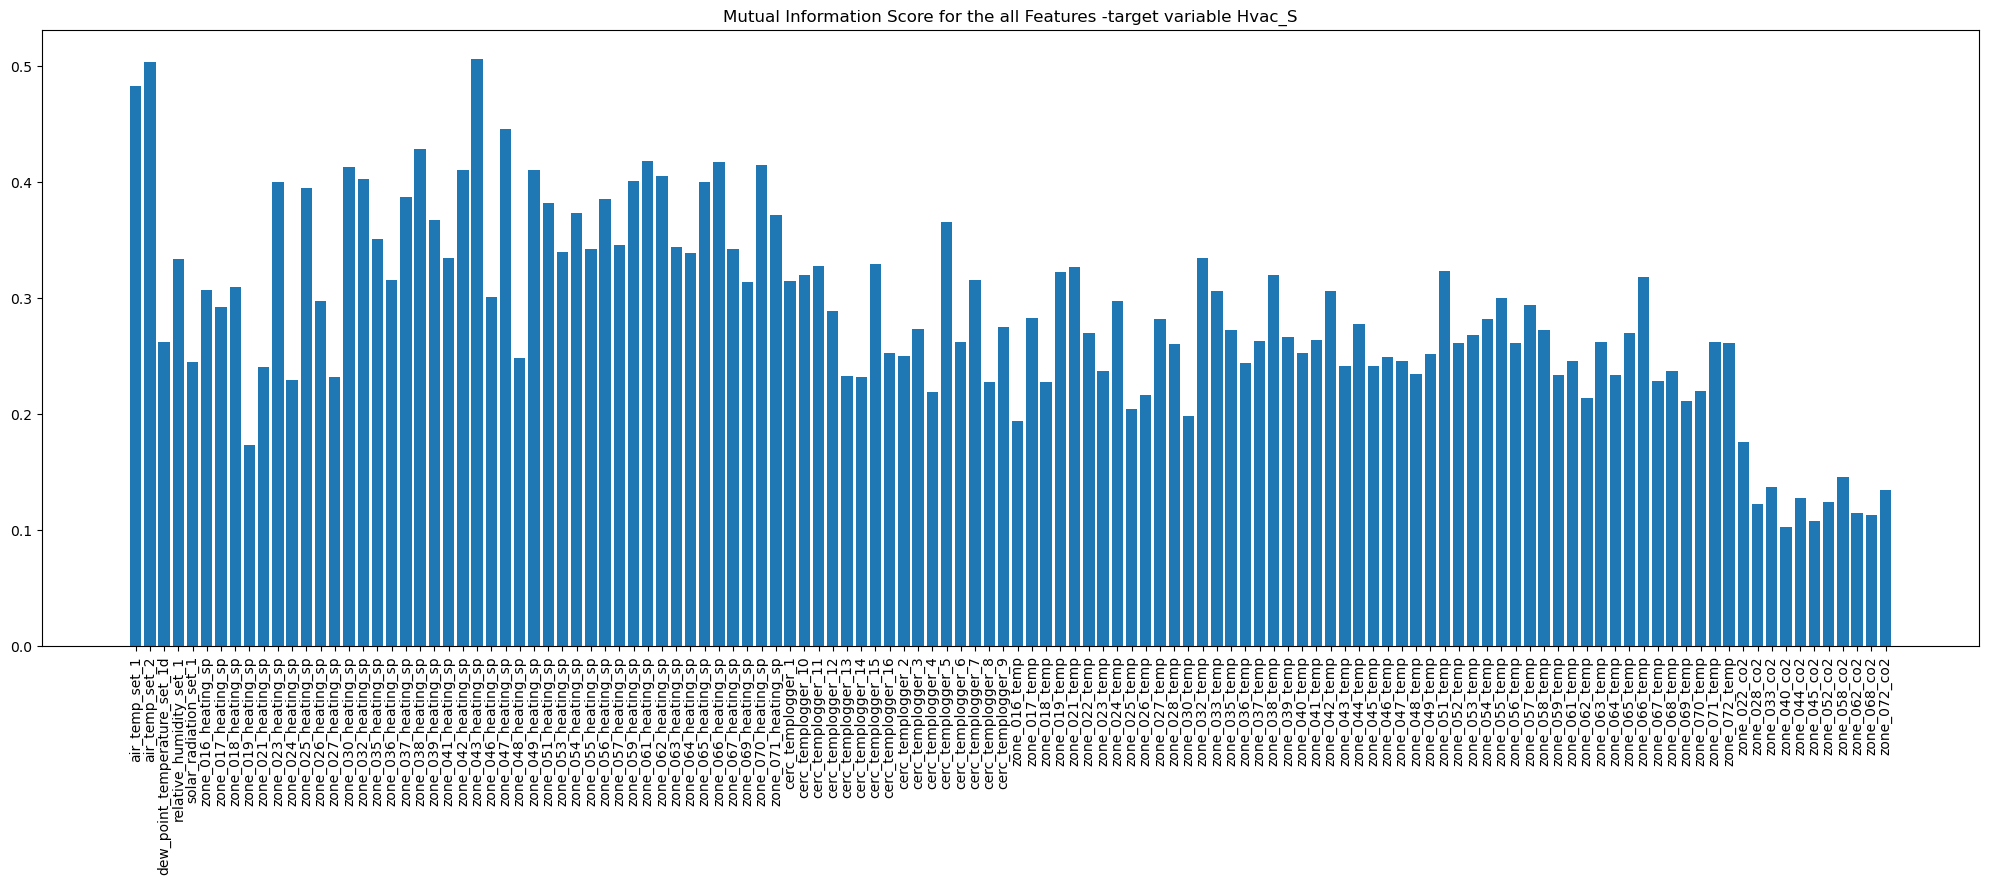

In [264]:
# plot the scores

plt.figure(figsize=(25, 8))
plt.bar(selected_feature_2.index,selected_feature_2.value)
plt.xticks(selected_feature_2.index, rotation='vertical')
plt.title('Mutual Information Score for the all Features -target variable Hvac_S')
plt.show()

#### Building Basic Linear Model

In [265]:
# fiting the model
Ln_model_2 = LinearRegression()
Ln_model_2.fit(X_train_fs, y_train)
# evaluate the model
y_pred_2 = Ln_model_2.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_pred_2, y_pred_2)
print('MAE: %.6f' % mae)

MAE: 0.000000


### 2.b  Mutual Information statistics - Target Variable hvac_N

In [266]:
# feature selection
X_train_fsN, X_test_fsN, fsN = select_features_mutinfo(X_train, y_train.hvac_N, X_test)

In [267]:
# Checking the scores for the features
feature_list_hvacN_mut={}
for i in range(len(fsN.scores_)):
    feature_list_hvacN_mut.update({fsN.feature_names_in_[i]: fsN.scores_[i]})
    print('Feature %d: %s : %f' % (i,fsN.feature_names_in_[i], fsN.scores_[i]))


Feature 0: air_temp_set_1 : 0.339564
Feature 1: air_temp_set_2 : 0.351079
Feature 2: dew_point_temperature_set_1d : 0.255828
Feature 3: relative_humidity_set_1 : 0.280590
Feature 4: solar_radiation_set_1 : 0.255298
Feature 5: zone_016_heating_sp : 0.760115
Feature 6: zone_017_heating_sp : 0.727505
Feature 7: zone_018_heating_sp : 0.508006
Feature 8: zone_019_heating_sp : 0.407017
Feature 9: zone_021_heating_sp : 0.763931
Feature 10: zone_023_heating_sp : 0.753363
Feature 11: zone_024_heating_sp : 0.551551
Feature 12: zone_025_heating_sp : 0.841632
Feature 13: zone_026_heating_sp : 0.620736
Feature 14: zone_027_heating_sp : 0.503280
Feature 15: zone_030_heating_sp : 0.780299
Feature 16: zone_032_heating_sp : 0.815656
Feature 17: zone_035_heating_sp : 0.823425
Feature 18: zone_036_heating_sp : 0.837742
Feature 19: zone_037_heating_sp : 0.783789
Feature 20: zone_038_heating_sp : 0.505801
Feature 21: zone_039_heating_sp : 0.994279
Feature 22: zone_041_heating_sp : 0.642440
Feature 23: zone

In [268]:
#creating dataframe from dictionary
selected_feature_N2=pd.DataFrame.from_dict(feature_list_hvacN_mut,columns=['value'],orient='index')

#Sorting and listing top 40 features based on scores
top_40_withmut_score_N=selected_feature_N2.sort_values(by='value',ascending=False)[:40]

In [269]:
top_40_withmut_score_N.index

Index(['zone_071_heating_sp', 'zone_039_heating_sp', 'zone_059_heating_sp',
       'zone_056_heating_sp', 'zone_055_heating_sp', 'zone_070_heating_sp',
       'zone_049_heating_sp', 'zone_051_heating_sp', 'zone_025_heating_sp',
       'zone_065_heating_sp', 'zone_036_heating_sp', 'zone_053_heating_sp',
       'zone_035_heating_sp', 'zone_043_heating_sp', 'zone_032_heating_sp',
       'zone_054_heating_sp', 'zone_066_heating_sp', 'zone_061_heating_sp',
       'zone_037_heating_sp', 'zone_057_heating_sp', 'zone_030_heating_sp',
       'zone_021_heating_sp', 'zone_016_heating_sp', 'zone_023_heating_sp',
       'zone_063_heating_sp', 'zone_062_heating_sp', 'zone_064_heating_sp',
       'zone_017_heating_sp', 'zone_067_heating_sp', 'zone_069_heating_sp',
       'zone_047_heating_sp', 'zone_041_heating_sp', 'zone_026_heating_sp',
       'zone_046_heating_sp', 'zone_024_heating_sp', 'zone_018_heating_sp',
       'zone_038_heating_sp', 'zone_027_heating_sp', 'cerc_templogger_7',
       'zone_0

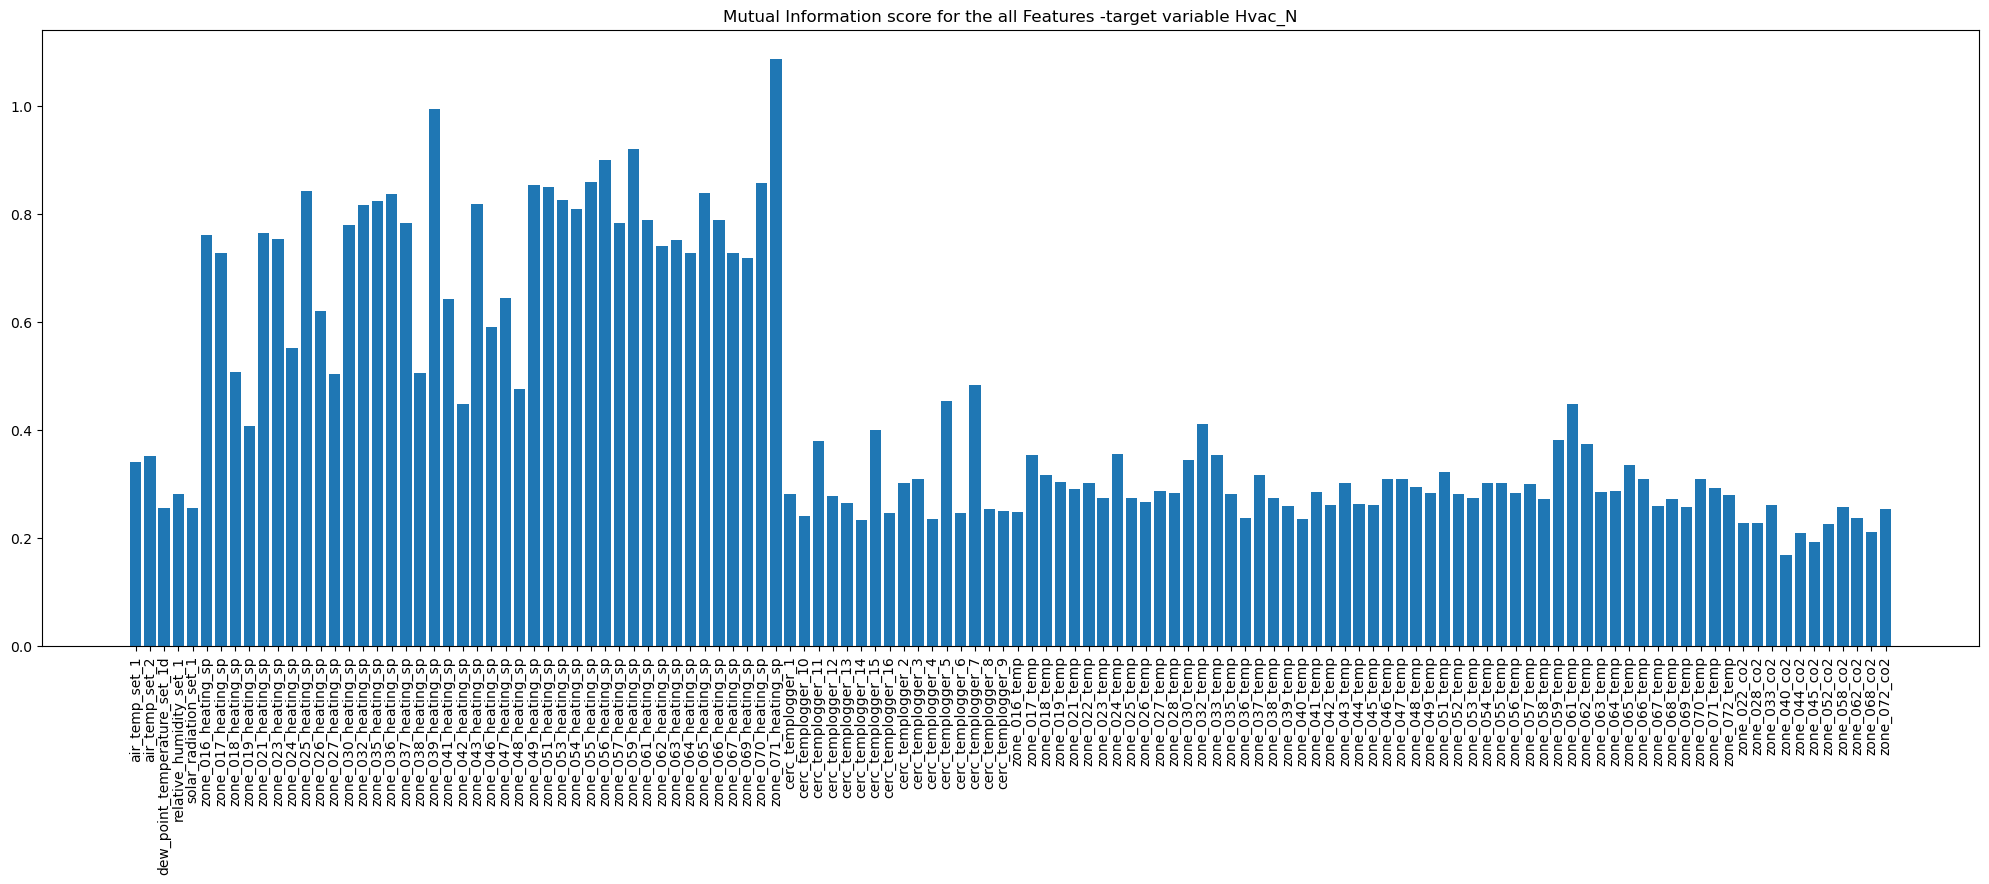

In [270]:
# plot the scores

plt.figure(figsize=(25, 8))
plt.bar(selected_feature_N2.index,selected_feature_N2.value)
plt.xticks(selected_feature_N2.index, rotation='vertical')
plt.title('Mutual Information score for the all Features -target variable Hvac_N')
plt.show()

# Building Models

In [25]:
#SVR #Just to know how it is performing

In [26]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Load the filtered data for hvac_N
filtered_data_n = pd.read_csv('train_90_N.csv')
hvac_targ = pd.read_csv('target_train_90.csv')

# Define features (X) and target variable (y) for hvac_N
X_n = filtered_data_n
y_n = hvac_targ['hvac_N']

# Split the data into training and testing sets for hvac_N
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler for hvac_N
scaler_n = MinMaxScaler()

# Fit and transform the features for hvac_N
X_train_scaled_n = scaler_n.fit_transform(X_train_n)
X_test_scaled_n = scaler_n.transform(X_test_n)

# Initialize the SVR model for hvac_N
svr_model_n = SVR()

# Train the SVR model for hvac_N
svr_model_n.fit(X_train_scaled_n, y_train_n)

# Make predictions for hvac_N
y_pred_n = svr_model_n.predict(X_test_scaled_n)

# Evaluate the model performance for hvac_N
mae_n = mean_absolute_error(y_test_n, y_pred_n)
rmse_n = mean_squared_error(y_test_n, y_pred_n, squared=False)
r2_n = r2_score(y_test_n, y_pred_n)

# Print evaluation metrics for hvac_N
print("Mean Absolute Error (MAE) for hvac_N:", mae_n)
print("Root Mean Squared Error (RMSE) for hvac_N:", rmse_n)
print("R-squared (R2) score for hvac_N:", r2_n)

Mean Absolute Error (MAE) for hvac_N: 5.898647736390772
Root Mean Squared Error (RMSE) for hvac_N: 9.00754796071782
R-squared (R2) score for hvac_N: 0.57796242206795


In [27]:
# Load the filtered data for hvac_S
filtered_data_s = pd.read_csv('filtered_south.csv')


# Define features (X) and target variable (y) for hvac_S
X_s = filtered_data_s
y_s = hvac_targ['hvac_S']

# Split the data into training and testing sets for hvac_S
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler for hvac_S
scaler_s = MinMaxScaler()

# Fit and transform the features for hvac_S
X_train_scaled_s = scaler_s.fit_transform(X_train_s)
X_test_scaled_s = scaler_s.transform(X_test_s)

# Initialize the SVR model for hvac_S
svr_model_s = SVR()

# Train the SVR model for hvac_S
svr_model_s.fit(X_train_scaled_s, y_train_s)

# Make predictions for hvac_S
y_pred_s = svr_model_s.predict(X_test_scaled_s)

# Evaluate the model performance for hvac_S
mae_s = mean_absolute_error(y_test_s, y_pred_s)
rmse_s = mean_squared_error(y_test_s, y_pred_s, squared=False)
r2_s = r2_score(y_test_s, y_pred_s)

# Print evaluation metrics for hvac_S
print("Mean Absolute Error (MAE) for hvac_S:", mae_s)
print("Root Mean Squared Error (RMSE) for hvac_S:", rmse_s)
print("R-squared (R2) score for hvac_S:", r2_s)

Mean Absolute Error (MAE) for hvac_S: 5.348905424613711
Root Mean Squared Error (RMSE) for hvac_S: 7.740148520601543
R-squared (R2) score for hvac_S: 0.6497686740268154


In [20]:
#Random forest

In [21]:
#hvac_N

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the filtered data for north
filtered_data_north = pd.read_csv('train_90_N.csv')
hvac_tar = pd.read_csv('target_train_90.csv')

# Define features (X) and target variable (y)
X = filtered_data_north
y = hvac_tar['hvac_N']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE) for hvac_N:", mae)
print("Root Mean Squared Error (RMSE) for hvac_N:", rmse)
print("R-squared (R2) score for hvac_N:", r2)


Mean Absolute Error (MAE) for hvac_N: 1.6581052100068665
Root Mean Squared Error (RMSE) for hvac_N: 3.054805872279215
R-squared (R2) score for hvac_N: 0.9497832023160002


In [5]:
# After normalization and adding more evaluation metrics

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# Function to calculate MSPE
def mean_squared_percentage_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2 / y_true).mean()

# Load the filtered data for hvac_N
filtered_data_n = pd.read_csv('train_90_N.csv')
hvac_tar = pd.read_csv('target_train_90.csv')

# Separate features (X) and target variable (y) for hvac_N
X_n = filtered_data_n
y_n = hvac_tar['hvac_N']

# Split the data into training and testing sets for hvac_N
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler for hvac_N
scaler_n = MinMaxScaler()

# Fit and transform the features for hvac_N
X_train_scaled_n = scaler_n.fit_transform(X_train_n)
X_test_scaled_n = scaler_n.transform(X_test_n)

# Initialize the Random Forest model for hvac_N
rf_model_n = RandomForestRegressor(random_state=42)
rf_model_n.fit(X_train_scaled_n, y_train_n)
y_pred_n = rf_model_n.predict(X_test_scaled_n)

# Evaluate the model performance for hvac_N
mse_n = mean_squared_error(y_test_n, y_pred_n)
mae_n = mean_absolute_error(y_test_n, y_pred_n)
rmse_n = mean_squared_error(y_test_n, y_pred_n, squared=False)
r2_n = r2_score(y_test_n, y_pred_n)
msle_n = mean_squared_log_error(y_test_n, y_pred_n)
medae_n = median_absolute_error(y_test_n, y_pred_n)
mape_n = mean_absolute_percentage_error(y_test_n, y_pred_n)
mspe_n = mean_squared_percentage_error(y_test_n, y_pred_n)
evs_n = explained_variance_score(y_test_n, y_pred_n)

# Calculate F-statistic using statsmodels
X_train_n_sm = sm.add_constant(X_train_n)
model_n = sm.OLS(y_train_n, X_train_n_sm)
result_n = model_n.fit()
f_statistic_n = result_n.fvalue

print("Metrics for hvac_n:")
print("Mean Squared Error (MSE):", mse_n)
print("Mean Absolute Error (MAE):", mae_n)
print("Root Mean Squared Error (RMSE):", rmse_n)
print("R-squared (R2) Score:", r2_n)
print("Mean Squared Logarithmic Error (MSLE):", msle_n)
print("Median Absolute Error (MedAE):", medae_n)
print("Mean Absolute Percentage Error (MAPE):", mape_n)
print("Explained Variance Score (EVS):", evs_n)
print("F-statistic:", f_statistic_n)

Metrics for hvac_n:
Mean Squared Error (MSE): 9.297880521963487
Mean Absolute Error (MAE): 1.6560348617203338
Root Mean Squared Error (RMSE): 3.0492426144804363
R-squared (R2) Score: 0.9499659403469477
Mean Squared Logarithmic Error (MSLE): 0.0866338406161647
Median Absolute Error (MedAE): 0.5767797673997421
Mean Absolute Percentage Error (MAPE): 404105901081336.75
Mean Squared Percentage Error (MSPE): inf
Explained Variance Score (EVS): 0.9499709140291251
F-statistic: 1585.4865899884355


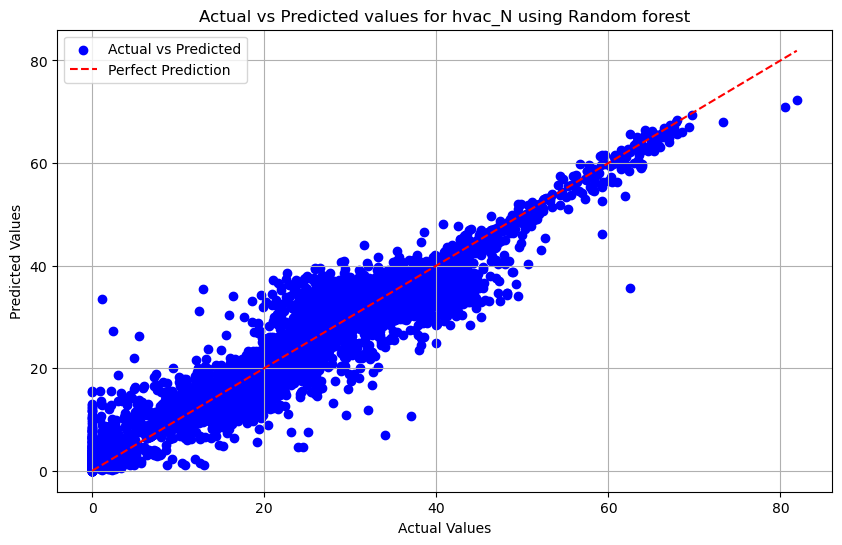

In [10]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_n, y_pred_n, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test_n), max(y_test_n)], [min(y_test_n), max(y_test_n)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted values for hvac_N using Random forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import pickle

# Save the trained model to a file
with open('rf_model_n.pkl', 'wb') as f:
    pickle.dump(rf_model_n, f)


In [9]:
# Load the saved model from the file
with open('rf_model_n.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Use the loaded model for predictions
y_pred_loaded = loaded_model.predict(X_test_scaled_n)


In [23]:
#hvac_S

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the filtered data from CSV
filtered_data_south = pd.read_csv('train_90_S.csv')

# Separate features (X) and target variable (y)
X = filtered_data_south
y = hvac_tar['hvac_S']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 14.173031671084196
Mean Absolute Error (MAE): 2.419547830577498
R-squared (R2) Score: 0.9150789960847577


In [12]:
# After Standardization and adding more evaluation metrics

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# Function to calculate MSPE
def mean_squared_percentage_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2 / y_true).mean()

# Load the filtered data for hvac_S
filtered_data_s = pd.read_csv('train_90_S.csv')
hvac_tar = pd.read_csv('target_train_90.csv')

# Separate features (X) and target variable (y) for hvac_S
X_s = filtered_data_s
y_s = hvac_tar['hvac_S']

# Split the data into training and testing sets for hvac_S
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler for hvac_S
scaler_s = MinMaxScaler()

# Fit and transform the features for hvac_S
X_train_scaled_s = scaler_s.fit_transform(X_train_s)
X_test_scaled_s = scaler_s.transform(X_test_s)

# Initialize the Random Forest model for hvac_S
rf_model_s = RandomForestRegressor(random_state=42)
rf_model_s.fit(X_train_scaled_s, y_train_s)
y_pred_s = rf_model_s.predict(X_test_scaled_s)

# Evaluate the model performance for hvac_S
mse_s = mean_squared_error(y_test_s, y_pred_s)
mae_s = mean_absolute_error(y_test_s, y_pred_s)
rmse_s = mean_squared_error(y_test_s, y_pred_s, squared=False)
r2_s = r2_score(y_test_s, y_pred_s)
msle_s = mean_squared_log_error(y_test_s, y_pred_s)
medae_s = median_absolute_error(y_test_s, y_pred_s)
mape_s = mean_absolute_percentage_error(y_test_s, y_pred_s)
mspe_s = mean_squared_percentage_error(y_test_s, y_pred_s)
evs_s = explained_variance_score(y_test_s, y_pred_s)

# Calculate F-statistic using statsmodels
X_train_s_sm = sm.add_constant(X_train_s) 
model_s = sm.OLS(y_train_s, X_train_s_sm)
result_s = model_s.fit()
f_statistic_s = result_s.fvalue

print("Metrics for hvac_S:")
print("Mean Squared Error (MSE):", mse_s)
print("Mean Absolute Error (MAE):", mae_s)
print("Root Mean Squared Error (RMSE):", rmse_s)
print("R-squared (R2) Score:", r2_s)
print("Mean Squared Logarithmic Error (MSLE):", msle_s)
print("Median Absolute Error (MedAE):", medae_s)
print("Mean Absolute Percentage Error (MAPE):", mape_s)
print("Explained Variance Score (EVS):", evs_s)
print("F-statistic:", f_statistic_s)


Metrics for hvac_S:
Mean Squared Error (MSE): 14.210459883658949
Mean Absolute Error (MAE): 2.418785294187174
Root Mean Squared Error (RMSE): 3.7696763632517514
R-squared (R2) Score: 0.914854736274975
Mean Squared Logarithmic Error (MSLE): 0.33977623167090004
Median Absolute Error (MedAE): 1.3758090666899907
Mean Absolute Percentage Error (MAPE): 1872744713252521.8
Mean Squared Percentage Error (MSPE): inf
Explained Variance Score (EVS): 0.9148547847281745
F-statistic: 1484.6441474632759


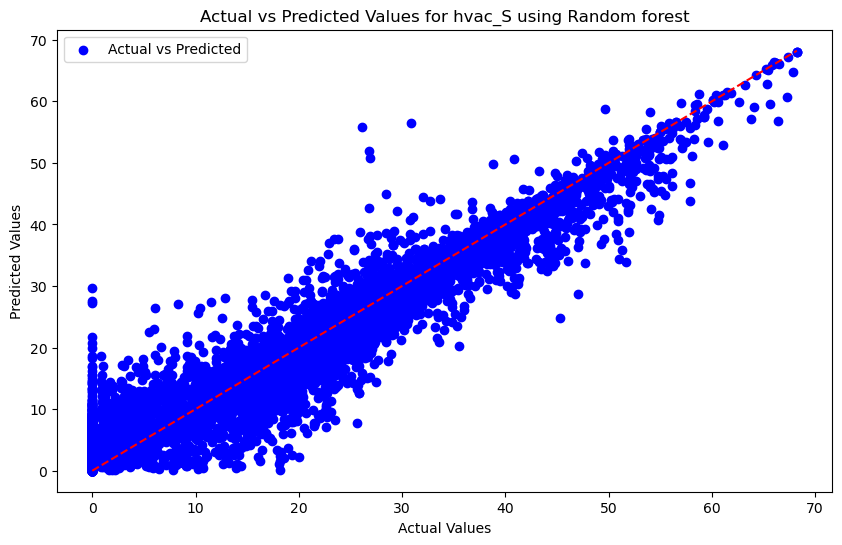

In [19]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_s, y_pred_s, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test_s), max(y_test_s)], [min(y_test_s), max(y_test_s)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for hvac_S using Random forest')
plt.legend()
plt.show()


In [15]:
#Saving the file

In [16]:
import pickle

# Save the model to a file
with open('random_forest_hvac_S.pkl', 'wb') as file:
    pickle.dump(rf_model_s, file)


In [18]:
# Load the saved model from the file
with open('random_forest_hvac_S.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
y_pred_loaded = loaded_model.predict(X_test_scaled_s)
